In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import re

# Basic Data Analysis
This notebook was just a playground to get a feel for the dataset and find out which features might be interesting

In [2]:
data_path = Path('data/')

collection_data_path = data_path / 'subtask4b_collection_data.pkl' 
query_dev_data_path = data_path / 'subtask4b_query_tweets_dev.tsv'
query_train_data_path = data_path / 'subtask4b_query_tweets_train.tsv'

In [3]:
df_collection = pd.read_pickle(collection_data_path)
df_collection

,cord_uid,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,label,time,timet
162,umvrwgaw,PMC,Professional and Home-Made Face Masks Reduce E...,10.1371/journal.pone.0002618,PMC2440799,18612429,cc-by,BACKGROUND: Governments are preparing for a po...,2008-07-09,"van der Sande, Marianne; Teunis, Peter; Sabel,...",PLoS One,NaN,NaN,NaN,umvrwgaw,2008-07-09,1215561600
611,spiud6ok,PMC,The Failure of R (0),10.1155/2011/527610,PMC3157160,21860658,cc-by,"The basic reproductive ratio, R (0), is one of...",2011-08-16,"Li, Jing; Blakeley, Daniel; Smith?, Robert J.",Comput Math Methods Med,NaN,NaN,NaN,spiud6ok,2011-08-16,1313452800
918,aclzp3iy,PMC,Pulmonary sequelae in a patient recovered from...,10.4103/0970-2113.99118,PMC3424870,22919170,cc-by-nc-sa,The pandemic of swine flu (H1N1) influenza spr...,2012,"Singh, Virendra; Sharma, Bharat Bhushan; Patel...",Lung India,NaN,NaN,NaN,aclzp3iy,2012-01-01,1325376000
993,ycxyn2a2,PMC,What was the primary mode of smallpox transmis...,10.3389/fcimb.2012.00150,PMC3509329,23226686,cc-by,The mode of infection transmission has profoun...,2012-11-29,"Milton, Donald K.",Front Cell Infect Microbiol,NaN,NaN,NaN,ycxyn2a2,2012-11-29,1354147200
1053,zxe95qy9,PMC,"Lessons from the History of Quarantine, from P...",10.3201/eid1902.120312,PMC3559034,23343512,no-cc,"In the new millennium, the centuries-old strat...",2013-02-03,"Tognotti, Eugenia",Emerg Infect Dis,NaN,NaN,NaN,zxe95qy9,2013-02-03,1359849600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055874,w094r17f,Medline; PMC,COVID-19 increased the risk of ICU-acquired bl...,10.1007/s00134-021-06346-w,PMC7839935,33506379,no-cc,PURPOSE: The primary objective of this study w...,2021-01-27,"Buetti, Niccolò; Ruckly, Stéphane; de Montmoll...",Intensive Care Med,NaN,NaN,NaN,w094r17f,2021-01-27,1611705600
1056107,wtqwghon,MedRxiv; WHO,Relative disease burdens of COVID-19 and seaso...,10.1101/2020.04.22.20073551,NaN,NaN,medrxiv,Comparisons between the mortality burdens of C...,2020-04-27,"Faust, Jeremy; del Rio, Carlos",NaN,NaN,NaN,NaN,wtqwghon,2020-04-27,1587945600
1056228,r5rctvul,Medline; PMC,COVID‐19 and the Gender Gap in Work Hours,10.1111/gwao.12506,PMC7361447,32837019,no-cc,School and daycare closures due to the COVID‐1...,2020-07-02,"Collins, Caitlyn; Landivar, Liana Christin; Ru...",Gend Work Organ,NaN,NaN,NaN,r5rctvul,2020-07-02,1593648000
1056344,yjqt74q0,Medline; PMC,"Prior infection by seasonal coronaviruses, as ...",10.2807/1560-7917.es.2021.26.13.2001782,PMC8017906,33797390,cc-by,BACKGROUND: Children have a low rate of COVID-...,2021-04-01,"Sermet-Gaudelus, Isabelle; Temmam, Sarah; Huon...",Euro Surveill,NaN,NaN,NaN,yjqt74q0,2021-04-01,1617235200


In [4]:
df_query_dev = pd.read_csv(query_dev_data_path, sep='\t')
df_query_dev

,post_id,tweet_text,cord_uid
0,16,covid recovery: this study from the usa reveal...,3qvh482o
1,69,"""Among 139 clients exposed to two symptomatic ...",r58aohnu
2,73,I recall early on reading that researchers who...,sts48u9i
3,93,You know you're credible when NIH website has ...,3sr2exq9
4,96,Resistance to antifungal medications is a grow...,ybwwmyqy
...,...,...,...
1395,14193,Residents at high risk of covid-19: effectiven...,0gn3b98n
1396,14196,"61% of teenagers hospitalized for covid were ""...",25bdifv6
1397,14203,"""fresh evidence backing melatonin against covi...",qn6wawxk
1398,14233,"the vaccine doesn't halt the spread, it is pro...",3u3i5myh


In [5]:
df_query_train = pd.read_csv(query_train_data_path, sep='\t')
df_query_train

,post_id,tweet_text,cord_uid
0,0,Oral care in rehabilitation medicine: oral vul...,htlvpvz5
1,1,this study isn't receiving sufficient attentio...,4kfl29ul
2,2,"thanks, xi jinping. a reminder that this study...",jtwb17u8
3,3,Taiwan - a population of 23 million has had ju...,0w9k8iy1
4,4,Obtaining a diagnosis of autism in lower incom...,tiqksd69
...,...,...,...
12848,14248,"""evidence on covid-19 reveals a growing body o...",9169o29b
12849,14249,Outdoor lighting has detrimental impacts on lo...,s2bpha8l
12850,14250,"26/ and influenza virus (and other pathogens, ...",atloc9th
12851,14251,does it?'sars-cov-2-naïve vaccinees had a 13.0...,t4y1ylb3


In [6]:
df_query_combined = pd.concat([df_query_train, df_query_dev])
df_query_combined

,post_id,tweet_text,cord_uid
0,0,Oral care in rehabilitation medicine: oral vul...,htlvpvz5
1,1,this study isn't receiving sufficient attentio...,4kfl29ul
2,2,"thanks, xi jinping. a reminder that this study...",jtwb17u8
3,3,Taiwan - a population of 23 million has had ju...,0w9k8iy1
4,4,Obtaining a diagnosis of autism in lower incom...,tiqksd69
...,...,...,...
1395,14193,Residents at high risk of covid-19: effectiven...,0gn3b98n
1396,14196,"61% of teenagers hospitalized for covid were ""...",25bdifv6
1397,14203,"""fresh evidence backing melatonin against covi...",qn6wawxk
1398,14233,"the vaccine doesn't halt the spread, it is pro...",3u3i5myh


# Data analysis
## Is DOI part of tweets?

In [7]:
df_collection['doi_prefix'] = df_collection['doi'].str.split('/').str[0]

matching_tweets = df_query_combined[df_query_combined['tweet_text'].apply(
    lambda text: any(doi_prefix in text for doi_prefix in df_collection['doi_prefix'].dropna())
)]

display(matching_tweets['tweet_text'].to_numpy())

display(f"Number of matching tweets: {len(matching_tweets)}, Total number of tweets: {len(df_query_combined)}")

array(['False positives for RT-PCR are 0.04% (95% confidence interval [CI], 0.01 to 0.12%). 3 of 7,242 tests NIH found the same exact rate, except they looked at over 27 million tests ----  DOI: 10.1097/jom.0000000000002138 Try reading studies',
       '10.1111/jch.14338  daily‐by‐daily blood pressure fluctuations in hospitalized patients with COVID‐19',
       "Dr. Brown's study published.  Program will have less than 1% public health benefit because the absolute risk reduction is extremely small.  The overall improved epidemic curves cannot be attributed to needle-in-arm.  pmcid: pmc7996517 doi: 10.3390/medicina57030199"],
      dtype=object)

'Number of matching tweets: 3, Total number of tweets: 14253'

Only 3/14253 tweets include a DOI so doesnt seem worth it to invest effort into using this columnn

## Is PMC code part of tweets?

In [8]:
df_query_combined['tweet_text_lower'] = df_query_combined['tweet_text'].str.lower()

tweets_with_pmc = df_query_combined[df_query_combined['tweet_text_lower'].str.contains('pmc')]

df_collection['pmcid_numeric'] = df_collection['pmcid'].str.extract(r'PMC(\d+)', expand=False)
tweets_with_pmcid_numeric = df_query_combined[df_query_combined['tweet_text_lower'].apply(
    lambda text: any(pmcid in text for pmcid in df_collection['pmcid_numeric'].dropna())
)]


display(tweets_with_pmc['tweet_text'].to_numpy())
display(tweets_with_pmcid_numeric['tweet_text'].to_numpy())

display(f"Number of tweets containing 'pmc': {len(tweets_with_pmc)}")
display(f"Number of tweets containing numeric part of pmcid: {len(tweets_with_pmcid_numeric)}")

array(['This is why people and doctors need to comprehend and focus on the active processes of the resolution of inflammation via pro-resolving lipid mediators.  cancer and covid-19: collectively devastating - pmc',
       "Dr. Brown's study published.  Program will have less than 1% public health benefit because the absolute risk reduction is extremely small.  The overall improved epidemic curves cannot be attributed to needle-in-arm.  pmcid: pmc7996517 doi: 10.3390/medicina57030199"],
      dtype=object)

array(["Dr. Brown's study published.  Program will have less than 1% public health benefit because the absolute risk reduction is extremely small.  The overall improved epidemic curves cannot be attributed to needle-in-arm.  pmcid: pmc7996517 doi: 10.3390/medicina57030199"],
      dtype=object)

"Number of tweets containing 'pmc': 2"

'Number of tweets containing numeric part of pmcid: 1'

Again only 2 tweets use the PMC id so doesn't seem worth it either

## Is pubmed id part of tweets?

In [9]:
df_collection['pubmed_id_str'] = df_collection['pubmed_id'].dropna().astype(str)

tweets_with_pubmed_id = df_query_combined[df_query_combined['tweet_text_lower'].apply(
    lambda text: any(pubmed_id in text for pubmed_id in df_collection['pubmed_id_str'].dropna())
)]

display(tweets_with_pubmed_id['tweet_text'].to_numpy())
display(f"Number of tweets containing PubMed IDs: {len(tweets_with_pubmed_id)}")

array([], dtype=object)

'Number of tweets containing PubMed IDs: 0'

Probably is of no help :D

## Is publicationn year part of tweets?

In [10]:
df_collection['publish_year'] = df_collection['publish_time'].str.split('-').str[0]

tweets_with_year = df_query_combined[df_query_combined['tweet_text_lower'].apply(
    lambda text: any(str(year) in text for year in df_collection['publish_year'].dropna().unique())
)]

display(tweets_with_year['tweet_text'].to_numpy())
display(f"Number of tweets containing a year from df_collection: {len(tweets_with_year)}")

array(['"10 studies that reported estimates of the effectiveness of face masks in reducing laboratory-confirmed influenza... during 1946–July 27, 2018. In pooled analysis, we found no substantial reduction in influenza transmission with the use of face masks"',
       '#donanemab for #alzheimer, misleadingly spun as positive: “donanemab resulted in a better [...] capacity to perform activities of daily living than placebo at 76 weeks”. the data suggest otherwise. (1/8)  #elililly  #adpd2021',
       'xu, x. s., bulger, e. a.,..., akbari, o. s., marshall, j. m. and bier, e. (2020). active genetic neutralizing elements for halting or eradicating gene drives. mol cell.',
       'genuinely inquisitive. why do you think there was almost no flu season in 2020?  compare case rates in 2017, 2018, 2019 and 2020. how do you explain the significantly lower infection rates?',
       'Prevalence of infection-induced SARS-CoV-2 antibodies — United States, September 2021–February 2022 | MMWR - Center

'Number of tweets containing a year from df_collection: 872'

Might be worth it to include the year somehow? With some leeway so that not exact but close matches also get some weight/score?

In [11]:
df_collection['publish_year'].astype(float).describe()

count    7715.000000
mean     2020.541283
std         1.864047
min      1990.000000
25%      2020.000000
50%      2021.000000
75%      2021.000000
max      2022.000000
Name: publish_year, dtype: float64

<Axes: title={'center': 'Distribution of publish years in df_collection'}, xlabel='Year', ylabel='Count'>

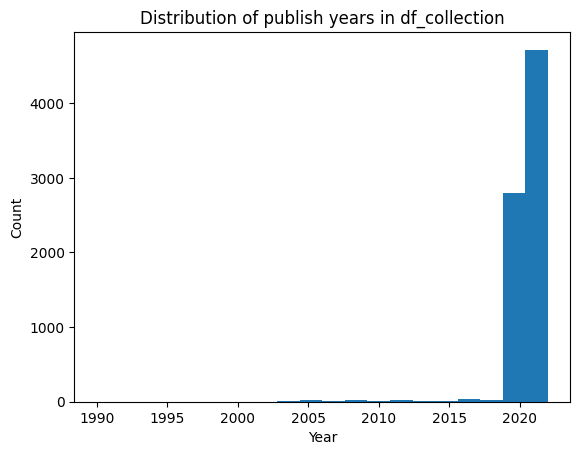

In [12]:
df_collection['publish_year'].astype(float).plot.hist(
    bins=20,
    title='Distribution of publish years in df_collection',
    xlabel='Year',
    ylabel='Count'
)

In [13]:
year_counts = df_collection['publish_year'].value_counts().sort_index()
display(year_counts)

publish_year
1990       2
2002       1
2003       4
2004      11
2005      18
2006       9
2007       7
2008      11
2009      14
2010       8
2011      11
2012      15
2013      14
2014       7
2015       8
2016      13
2017      18
2018      25
2019      37
2020    2766
2021    3489
2022    1227
Name: count, dtype: int64

We only have a small amount of years mentioned. Are they actually the publication year or just the current year mentioned by a tweet (aka. 'we are in the year 2022 and people still do x')

In [14]:
if 'publish_year' not in df_query_combined.columns:
    df_query_combined = df_query_combined.merge(
        df_collection[['cord_uid', 'publish_year']], 
        on='cord_uid', 
        how='left'
    )

df_query_combined['mentioned_years'] = df_query_combined['tweet_text_lower'].str.findall(r'\b(19[0-9]{2}|20[0-9]{2})\b')

df_query_combined['year_match'] = df_query_combined.apply(
    lambda row: any(year == row['publish_year'] for year in row['mentioned_years']),
    axis=1
)

matching_count = df_query_combined['year_match'].sum()
non_matching_count = len(df_query_combined[df_query_combined['mentioned_years'].str.len() > 0]) - matching_count

display(f"Number of matching tweets: {matching_count}")
display(f"Number of non-matching tweets: {non_matching_count}")

display("matching years:")
display(df_query_combined[df_query_combined['year_match']]['mentioned_years'].value_counts())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display("Non-matching years:")
    display(df_query_combined[~df_query_combined['year_match']]['mentioned_years'].value_counts())

'Number of matching tweets: 400'

'Number of non-matching tweets: 468'

'matching years:'

mentioned_years
[2020]                            146
[2021]                             92
[2020, 2021]                       28
[2005]                             28
[2022]                             14
[2015]                              9
[2012]                              6
[2019, 2020]                        5
[2020, 2020]                        5
[2021, 2021]                        5
[2021, 2022]                        5
[2007]                              4
[2009]                              4
[2008]                              3
[2017]                              3
[2021, 2020]                        3
[2022, 2022]                        3
[2005, 2005]                        2
[2018]                              2
[2020, 2022]                        2
[2011]                              2
[2006]                              2
[2003]                              2
[2020, 2017, 2018, 2019, 2020]      1
[2005, 2020]                        1
[2015, 2020]                      

'Non-matching years:'

mentioned_years
[]                                      13385
[2019]                                    114
[2020]                                    112
[2021]                                     31
[2017]                                     23
[2020, 2021]                               19
[2003]                                     19
[2019, 2019]                               10
[2018]                                     10
[2022]                                      8
[1918]                                      7
[2016]                                      7
[2019, 2020]                                7
[2015]                                      6
[2020, 2020]                                5
[2000]                                      4
[2009]                                      4
[1946, 2018]                                3
[2018, 2020]                                3
[2010]                                      3
[2014, 2019]                                2
[2014]            

Maybe helps slightly? Atleast the most promising so far for matches outside of 2020/2021
However in half of the tweets mentioning a year they don't match with the publication year. A neural model might be able to make sense of it/learn a pattern.

## Are authors part of tweets?

In [15]:
df_collection['last_names'] = df_collection['authors'].str.split(';').apply(
    lambda authors: [author.split(',')[0].strip() for author in authors] if isinstance(authors, list) else authors
)

if 'last_names' not in df_query_combined.columns:
    df_query_combined = df_query_combined.merge(
        df_collection[['cord_uid', 'last_names']], 
        on='cord_uid', 
        how='left'
    )

def match_authors(tweet_text, last_names):
    if not isinstance(last_names, list):
        return 0
    matches = 0
    for last_name in last_names:
        if re.search(rf'\b{re.escape(last_name.lower())}\b', tweet_text):
            matches += 1
    return matches

df_query_combined['author_matches'] = df_query_combined.apply(
    lambda row: match_authors(row['tweet_text_lower'], row['last_names']),
    axis=1
)

tweets_with_author_matches = df_query_combined[df_query_combined['author_matches'] > 0]

with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
    print(f"Number of tweets mentioning authors' last names: {len(tweets_with_author_matches)}")
    display(tweets_with_author_matches[['tweet_text', 'last_names']].head(10))

Number of tweets mentioning authors' last names: 409


,tweet_text,last_names
17,"A report on myocarditis adverse reactions in the U.S. vaccine adverse events reporting system (vaers) in association with COVID-19 injectable biological products Jessica Rose, Peter A. McCullough injection.","[Rose, McCullough]"
33,tweets of #sarscov2 + rbp kos + #mitochondria ko screen in 7 viruses many rbps and mito factors work as host-protective during rna virus infections! w/ carette horvath,"[Flynn, Belk, Qi, Yasumoto, Wei, Alfajaro, Shi, Mumbach, Limaye, DeWeirdt, Schmitz, Parker, Woo, Chang, Horvath, Carette, Bertozzi, Wilen, Satpathy]"
41,"xu, x. s., bulger, e. a.,..., akbari, o. s., marshall, j. m. and bier, e. (2020). active genetic neutralizing elements for halting or eradicating gene drives. mol cell.","[Xu, Bulger, Gantz, Klanseck, Heimler, Auradkar, Bennett, Miller, Leahy, Juste, Buchman, Akbari, Marshall, Bier]"
148,"International travel restrictions primarily impact countries with low COVID incidence and numerous arrivals, or those near the brink of an epidemic. Our new Lancet paper with Joe Wu and others at.","[Russell, Wu, Clifford, Edmunds, Kucharski, Jit]"
167,"Significant observational study from Israel: ""an inverse correlation was shown between the level of vitamin D and the risks of SARS-CoV-2 infection and of severe disease in those infected.""","[Israel, Cicurel, Feldhamer, Stern, Dror, Giveon, Gillis, Strich, Lavie]"
170,"the cohort study, limited to non-hospitalized patients in arizona - “mild” cases - found a 68% prevalence of 1 or more covid symptom after 30 days, rising to 77% after 60 days. (we will explore an explanation later). (5/🧵) bell et al,","[Bell, Catalfamo, Farland, Ernst, Jacobs, Klimentidis, Jehn, Pogreba-Brown]"
173,"#LongCovid often involves cognitive symptoms. Noting the clinical parallels between “chemo-fog” and “covid-fog”, we asked whether there are also neurobiological parallels, in collaboration with Akiko Iwasaki’s lab.","[Fernández-Castañeda, Lu, Geraghty, Song, Lee, Wood, Yalçın, Taylor, Dutton, Acosta-Alvarez, Ni, Contreras-Esquivel, Gehlhausen, Klein, Lucas, Mao, Silva, Peña-Hernández, Tabachnikova, Takahashi, Tabacof, Tosto-Mancuso, Breyman, Kontorovich, McCarthy, Quezado, Hefti, Perl, Folkerth, Putrino, Nath, Iwasaki, Monje]"
189,"thread (30mar2020 breaking): 1/x newly publicized study by chen evaluating #hydroxychloroquine (hcq, n=31, 200 mg bid) vs control (n= 31) for 5 days in mild #covid19 patients, showing enhanced clinical outcomes and chest ct favoring hcq.","[Chen, Hu, Zhang, Jiang, Han, Yan, Zhuang, Hu, Zhang]"
204,"""discrimination and capitalism mutually construct harmful social conditions that fundamentally shape covid-19 disease inequities"" by whitney n. laster pirtle #covid19 #rootcauses",[Laster Pirtle]
237,"Remember, take your supplement, people! Potential interventions for SARS-CoV-2 infections: zinc showing promise - Brewer - - Journal of Medical Virology - Wiley Online Library","[Brewer, Gomez Marti, Brufsky]"


Seems to be a decent information source to maybe get a percent or two more?

## is mag id in tweets?

In [16]:
display(df_collection['mag_id'].describe())
df_collection['mag_id'].isna().sum() / len(df_collection) * 100
print(f"Percentage of missing mag_id: {df_collection['mag_id'].isna().sum() / len(df_collection) * 100:.2f}%")

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: mag_id, dtype: float64

Percentage of missing mag_id: 100.00%


No item in the collection has an id?? Why does this column even exist?

## is covidence id in tweet text?

In [17]:
df_collection['who_covidence_id_suffix'] = df_collection['who_covidence_id'].dropna().str.split('-').str[-1]

tweets_with_covidence_id = df_query_combined[df_query_combined['tweet_text_lower'].apply(
    lambda text: any(suffix in text for suffix in df_collection['who_covidence_id_suffix'].dropna())
)]

display(tweets_with_covidence_id[['tweet_text']])
display(f"Number of tweets containing WHO Covidence ID suffix: {len(tweets_with_covidence_id)}")

,tweet_text


'Number of tweets containing WHO Covidence ID suffix: 0'

In [18]:
df_collection['who_covidence_id_text'] = df_collection['who_covidence_id'].dropna().str.extract(r'#(.*?)-', expand=False)

# Check if any of these parts are in the tweet text
tweets_with_covidence_part = df_query_combined[df_query_combined['tweet_text_lower'].apply(
    lambda text: any(part in text for part in df_collection['who_covidence_id_text'].dropna().unique())
)]

display(tweets_with_covidence_part[['tweet_text']])
display(f"Number of tweets containing parts of WHO Covidence ID: {len(tweets_with_covidence_part)}")

,tweet_text


'Number of tweets containing parts of WHO Covidence ID: 0'

In [19]:
df_collection['who_covidence_id_text'].dropna().unique()

array(['ppcovidwho', 'covidwho', 'grc', 'mdl', 'ppmedrxiv', 'ppbiorxiv'],
      dtype=object)

Useless info

## Is arxiv id in text

In [20]:
tweets_with_arxiv_id = df_query_combined[df_query_combined['tweet_text_lower'].apply(
    lambda text: any(str(arxiv_id) in text for arxiv_id in df_collection['arxiv_id'].dropna().unique())
)]

display(tweets_with_arxiv_id[['tweet_text']])
display(f"Number of tweets containing arXiv IDs: {len(tweets_with_arxiv_id)}")

,tweet_text


'Number of tweets containing arXiv IDs: 0'

Not part of tweets either

## Is journal part of tweet?

In [21]:
df_collection['journal_lower'] = df_collection['journal'].dropna().str.lower()

if 'journal_lower' not in df_query_combined.columns:
    df_query_combined = df_query_combined.merge(
        df_collection[['cord_uid', 'journal_lower']], 
        on='cord_uid', 
        how='left'
    )

# Check if the journal name from the respective tweet is mentioned in the tweet text
tweets_with_journal = df_query_combined[df_query_combined.apply(
    lambda row: row['journal_lower'] in row['tweet_text_lower'] if pd.notna(row['journal_lower']) else False,
    axis=1
)]

with pd.option_context('display.max_colwidth', None):
    display(tweets_with_journal[['tweet_text', 'journal_lower']].head(10))
    display(f"Number of tweets containing journal names: {len(tweets_with_journal)}")

,tweet_text,journal_lower
22,this #machinelearning algorithm forecasts the emergence of #viral symptoms in healthcare workers using #wearable technology. | plos one,plos one
127,"Results of remdesivir, no impact. I’m disappointed for patients. impact of remdesivir vs standard care on clinical status at 11 days in patients with moderate covid-19: a randomized clinical trial | infectious diseases | jama | jama network",jama
134,"A gut microbiota-modulated neural pathway connecting the lower intestines to the liver and pancreas independently controls blood glucose, researchers publish in science, which could have implications for some metabolic disorder treatments.",science
145,A study of the regn-cov2 #antibody cocktail in rhesus macaques and golden hamsters provides evidence it may offer clinical benefit in both prevention and treatment settings of #covid19 disease. Read the research in Science:,science
184,jci insight - anti-spike IgG triggers severe acute lung injury by distorting macrophage responses during acute SARS-CoV infection,jci insight
223,Women are more likely than men to experience headaches and altered awareness as a first symptom of stroke.,stroke
259,Relationship between reduced social engagement and depressive symptom emergence among community-residing elderly individuals: a longitudinal study during the COVID-19 pandemic. J Nutr Health Aging (2021).,j nutr health aging
265,Parents/older children being vaccinated safeguards younger children: crucial article from science: older/vaccinated household members lowered the risk of infection to younger children yet ineligible for vaccination (regardless of household size),science
279,"A 2019 study conducted by the department of defense found that the flu vaccine makes you more vulnerable to the coronavirus. ""Vaccine-induced virus interference was significantly linked to coronavirus"" don't say I didn't warn you.",vaccine
281,Important details just released in science. #covidー19 the pharmacokinetic characterization of the enhanced inhibitor reveals a marked lung preference and suitability for administration by the inhaled route.,science


'Number of tweets containing journal names: 455'

Could be of use as well

## Summary:

- so in total authors, journals, publication years might be interesting. But they might also be useless, because it could be that in the cases where they are mentioned, its already clear which paper is meant (e.g. direct reference to the title).
- the ids are probably only relevant if you want to look them up and train your models on the whole paper and not only on the abstract